In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../transactions.csv')
df.punk_id = df.punk_id.astype(int)
df.drop('Unnamed: 0',axis=1,inplace=True)
df['Txn'] = df['Txn'].astype('datetime64')

In [3]:
df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0


In [4]:
df.shape

(92823, 8)

In [5]:
punks = pd.read_csv('../Fase1_ETL/to_database/raw_punks.csv')
punks.drop('Unnamed: 0',axis=1,inplace=True)
punks.set_index('id',inplace=True)

In [6]:
punks.head()

,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
id,,,,,,,
0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN
2,Female,8090,Light,1,Wild Hair,0,NaN
3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,NaN
4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,NaN


In [7]:
punks.shape

(10000, 7)

In [8]:
aggregated_df = df.merge(punks, how='left',left_on='punk_id',right_on='id',left_index=False, right_index=False, sort=False)
aggregated_df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring


In [9]:
aggregated_df.Type.unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered'], dtype=object)

In [11]:
offered = aggregated_df[aggregated_df['Type']=='Offered']
offered.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
18,"100Ξ ($18,303)",NaN,NaN,2018-09-12,Offered,0,100.0,18303.0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
19,"200Ξ ($138,566)",NaN,NaN,2017-12-16,Offered,0,200.0,138566.0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
22,"400Ξ ($96,376)",NaN,NaN,2017-07-07,Offered,0,400.0,96376.0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
35,"79.50Ξ ($46,842)",NaN,NaN,2020-11-25,Offered,1,79.5,46842.0,Male,4352,Dark,2,"Mohawk,Smile",0,NaN
38,"119.10Ξ ($65,980)",NaN,NaN,2020-11-22,Offered,1,119.1,65980.0,Male,4352,Dark,2,"Mohawk,Smile",0,NaN


In [12]:
df_agg = offered[['From','To','Txn','punk_id','Type','amount_ethereum','types','skin','rarity','traits']].reset_index(drop=True)

In [13]:
df_agg.head()

,From,To,Txn,punk_id,Type,amount_ethereum,types,skin,rarity,traits
0,NaN,NaN,2018-09-12,0,Offered,100.0,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow"
1,NaN,NaN,2017-12-16,0,Offered,200.0,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow"
2,NaN,NaN,2017-07-07,0,Offered,400.0,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow"
3,NaN,NaN,2020-11-25,1,Offered,79.5,Male,Dark,4352,"Mohawk,Smile"
4,NaN,NaN,2020-11-22,1,Offered,119.1,Male,Dark,4352,"Mohawk,Smile"


In [14]:
df_agg.Type.unique()

array(['Offered'], dtype=object)

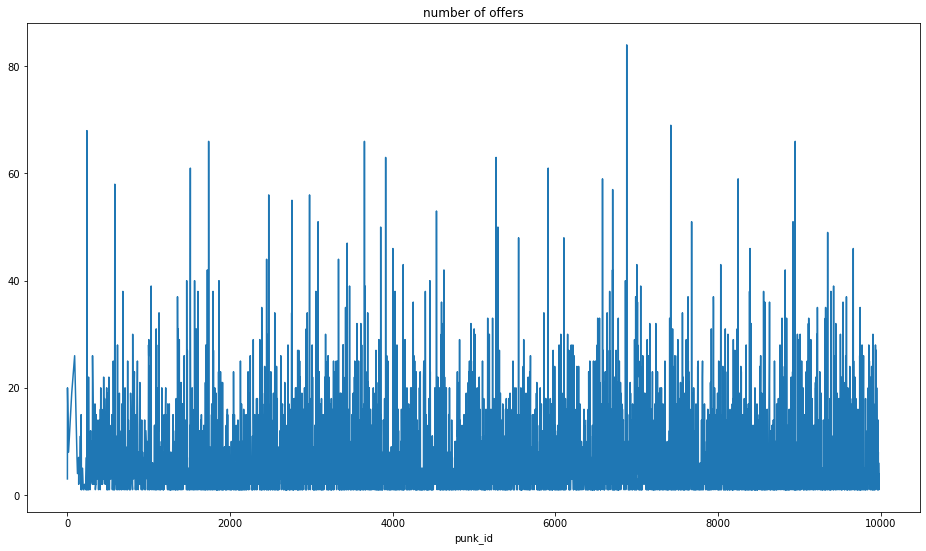

In [18]:
plt.subplots(figsize=(16,9))
df_agg.groupby('punk_id')['Type'].count().plot()
plt.title ('number of offers')
plt.show()

In [22]:
df_count_offered = df_agg.groupby('punk_id')['Type'].count().to_frame(name='total_offered')
df_mean_price = df_agg.groupby('punk_id')['amount_ethereum'].mean().to_frame(name='avg_offered_price')

In [23]:
df_counts = pd.concat([df_count_offered,df_mean_price,punks],axis=1)
df_counts = df_counts[['total_offered','avg_offered_price','types','rarity']]

In [25]:
df_counts.fillna(0,inplace=True)
df_counts.head(20)


,total_offered,avg_offered_price,types,rarity
0,3.0,233.333333,Female,2023
1,20.0,234.107000,Male,4352
2,0.0,0.000000,Female,8090
3,0.0,0.000000,Male,7896
4,0.0,0.000000,Male,7332
5,0.0,0.000000,Female,1960
6,0.0,0.000000,Male,7425
7,0.0,0.000000,Female,866
8,0.0,0.000000,Male,6530
9,0.0,0.000000,Male,1761


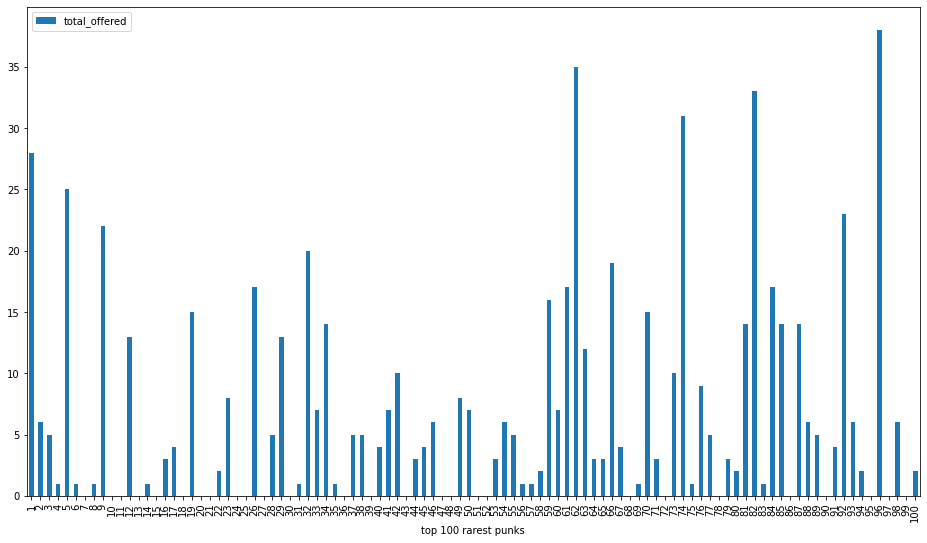

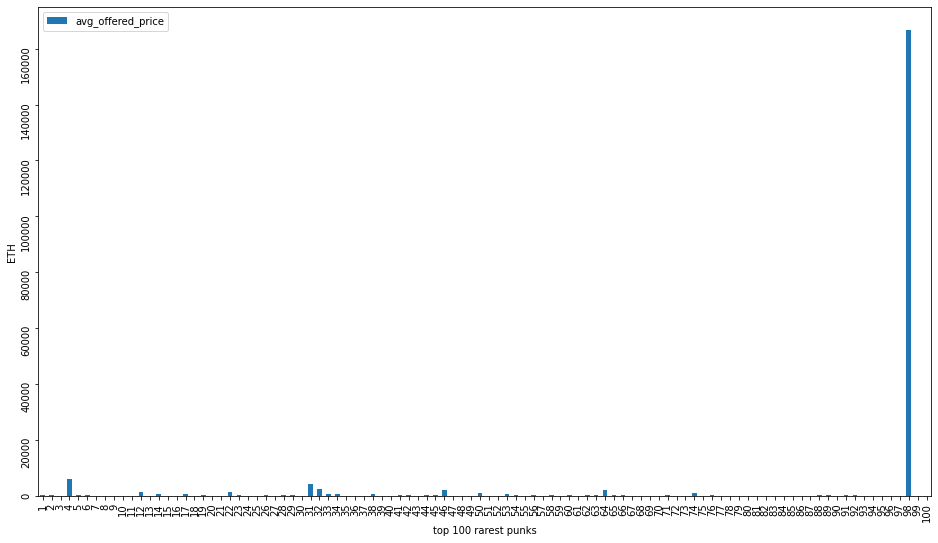

In [34]:
df_counts.sort_values(by='rarity')[:100].plot(x='rarity',y= 'total_offered',kind='bar',figsize=(16,9))
plt.xlabel('top 100 rarest punks')

df_counts.sort_values(by='rarity')[:100].plot(x='rarity',y= 'avg_offered_price',kind='bar',figsize=(16,9))
plt.yticks(rotation=90)
plt.xlabel('top 100 rarest punks')
plt.ylabel('ETH')

plt.show()

In [42]:
# number of bids does not really affect if punk is rare
# avg ETH bid price not not really have an affect 

In [ ]:
sns.boxplot(x="types", y="amount_ethereum", data=df_agg, whis=np.inf)
sns.swarmplot(x="types", y="amount_ethereum", data=df_agg, color=".2")

In [ ]:
df_agg.groupby('skin')['amount_ethereum'].mean()

In [ ]:
 sns.stripplot(x=df_agg["amount_ethereum"])

In [ ]:
sns.catplot(x='skin',y='amount_ethereum',data=df_agg,kind='box')
plt.show()